In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
from scipy.stats import shapiro,  poisson, chisquare, expon, kstest
from scipy import stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_csv('pair_nulos.csv',index_col = 0)

In [5]:
# Igual que en los ejercicios de la clase invertida, evalúa si las siguientes afirmaciones corresponden 
# a una distribución exponencial o poisson.
# 1 ¿El tiempo que transcurre entre la llegada de autobuses a una parada sigue una distribución exponencial o de Poisson?
# Distribución exponencial porque describe el tiempo entre enventos sucesivos.
# 2 ¿El número de errores en un artículo de noticias sigue una distribución exponencial o de Poisson?
# Distribución de Possion porque modela el numero de eventos raros que suceden en un espacio.
# 3 ¿El tiempo que transcurre entre la llegada de solicitudes de servicio en un restaurante sigue una distribución exponencial o de Poisson?
# Distribución exponencial porque describe el tiempo entre la llegada de solicitudes.
#4 ¿El número de accidentes de tráfico en una hora en una ciudad sigue una distribución exponencial o de Poisson?
# Distribución de Possion porque modela el numero de eventos raros que suceden en un periodo de tiempo.

# 5 ¿El tiempo entre llegadas de llamadas telefónicas a una central de emergencias sigue una distribución exponencial o de Poisson?
# Distribución exponencial porque describe el tiempo entre la llegada de llamadas telefónicas.
# 6 ¿El número de clientes que ingresan a una tienda en una hora sigue una distribución exponencial o de Poisson?
# Distribución de Possion porque modela el numero de eventos raros que suceden en un espacio.

# ¿El tiempo entre llegadas de correos electrónicos en una bandeja de entrada sigue una distribución exponencial o de Poisson?
## Distribución exponencial porque describe el tiempo entre la llegada de emails.
# ¿El número de defectos en una línea de producción por día sigue una distribución exponencial o de Poisson?
# Distribución de Possion porque modela el numero de eventos raros que suceden en un tiempo.
# ¿El tiempo que transcurre entre la llegada de taxis en una parada sigue una distribución exponencial o de Poisson?
# Distribución exponencial porque describe el tiempo entre la llegada de emails.
# ¿El número de errores de ortografía en un libro de texto sigue una distribución exponencial o de Poisson?
# Distribución de Possion porque modela el numero de eventos raros que suceden en un tiempo.

In [6]:
# Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase invertida, 
# piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.

# Intervalo de Confianza para la Esperanza de Vida
# Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% 
# para la esperanza de vida promedio de cada continente.
# Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

# queremos estudiar la comparativa de esperanza de vida media por continente, para, a nivel global, tomar decisiones a nivel estratégico

In [7]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'lattitude', 'longitude',
       'continente'],
      dtype='object')

<AxesSubplot:xlabel='lifeexpectancy', ylabel='Count'>

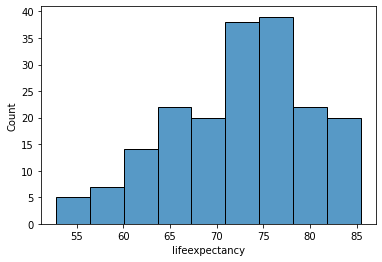

In [8]:
sns.histplot(data=df, x='lifeexpectancy')

In [9]:
# Eliminar filas con valores nulos en 'esperanza_vida'
data = df.dropna(subset=['lifeexpectancy'])

# Calcular intervalos de confianza para la esperanza de vida por continente
intervalos_confianza = data.groupby('continente')['lifeexpectancy'].agg(lambda x: stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=stats.sem(x)))

# intervalo de confianza al 95% para la esperanza de vida promedio de cada continente.
print(intervalos_confianza)

continente
América del Norte    (73.29119033550846, 76.73738109306295)
América del Sur      (72.94535743062862, 76.92130923603806)
Asia                 (72.37466101428559, 75.22533898571446)
Desconocido          (68.59103736516008, 77.14229596817324)
Europa               (78.13507999114816, 80.50081744474929)
Oceanía              (67.35995898766673, 75.49458646687872)
África               (61.83577210326866, 65.30300340693543)
Name: lifeexpectancy, dtype: object


In [10]:
# Intervalo de Confianza para el PIB
# Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) 
# de los continentes.

data = df.dropna(subset=['gdp'])

# Calcular intervalos de confianza para gdp por continente
media_confi_gdp = data.groupby('continente')['gdp'].mean()
error_gdp = data.groupby('continente')['gdp'].apply(stats.sem)  # Calcular el error por continente
nivel_confi = 0.90
grados_libertad = len(data['gdp'])-1
valor_critico = stats.t.ppf((1+nivel_confi)/2, df=grados_libertad)
lim_inf = media_confi_gdp-valor_critico*error_gdp
lim_sup = media_confi_gdp+valor_critico*error_gdp
print(lim_inf)
print(lim_inf)

continente
América del Norte    5.307950e+09
América del Sur      7.908478e+10
Asia                 4.512226e+10
Desconocido         -7.897916e+11
Europa               2.831550e+11
Oceanía             -5.068753e+10
África               2.810666e+10
Name: gdp, dtype: float64
continente
América del Norte    5.307950e+09
América del Sur      7.908478e+10
Asia                 4.512226e+10
Desconocido         -7.897916e+11
Europa               2.831550e+11
Oceanía             -5.068753e+10
África               2.810666e+10
Name: gdp, dtype: float64


In [11]:
# Intervalo de Confianza para la Tasa de Natalidad BELEN
# Contexto: Trabajas en una agencia gubernamental que se ocupa de cuestiones demográficas y deseas determinar el intervalo de confianza al 99% para la tasa de natalidad promedio en Asia.



In [18]:
# Intervalo de Confianza para la Tasa de Desempleo
# Contexto: Eres un analista de políticas públicas y deseas calcular el intervalo de confianza al 95% para la tasa de desempleo promedio en los países de Oceanía.

data = df.dropna(subset=['unemploymentrate'])


# Filtra los datos para incluir solo los países de Oceanía
oceania_p = data[data['continente'] == 'Oceanía']
tasas_desempleo = oceania_p['unemploymentrate']
media = np.mean(tasas_desempleo)
desviacion_estandar = np.std(tasas_desempleo)
grados_libertad2 = len(tasas_desempleo)
nivel_confianza = 0.95
error_estandar = stats.sem(tasas_desempleo)
intervalo_confianza = stats.t.interval(nivel_confianza, grados_libertad2 - 1, loc=media, scale=error_estandar)

# Muestra los resultados
print(f"Tasa de desempleo promedio en Oceanía: {media:.2f}")
print(f"Intervalo de confianza al {nivel_confianza * 100}%: ({intervalo_confianza[0]:.2f}, {intervalo_confianza[1]:.2f})")


Tasa de desempleo promedio en Oceanía: 3.79
Intervalo de confianza al 95.0%: (1.73, 5.86)


In [14]:
# Intervalo de Confianza para la Tasa de Impuestos BELEN
# Contexto: Trabajas en un ministerio de finanzas y deseas estimar el intervalo de confianza al 90% para la tasa de impuestos promedio en los países de África.

In [24]:
# Ejercicios prueba de hipótesis: Hasta ahora en la lección y en los ejercicios de la clase invertida os hemos propuesto un contexto y 
# unas hipótesis para entender que es la prueba de hipótesis. Ahora es tu turno, tienes que pensar en 2 hipótesis que quieras aceptar o 
# rechazar usando una prueba de hipótesis en base a los datos que tenemos.

#Hipótesis 1: Tasa de Desempleo en dos continentes, Europa y América del Norte
# H0 = No hay diferencias
# H1 = Existen diferencias significativas en la tasa de empleo de ambos continentes

data = df.dropna(subset=['unemploymentrate'])

europa_df = data[data['continente'] == 'Europa']
na_df = data[data['continente'] == 'América del Norte']

tdes_europa = europa_df['unemploymentrate']
tdes_na = na_df['unemploymentrate']
t_stat, p_value = stats.ttest_ind(tdes_europa, tdes_na, equal_var=False)
print(f"T-estadística: {t_stat.round(4)}")
print(f"Valor p: {p_value.round(4)}")
nivel_significativo = 0.05
if p_value < nivel_significativo:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en la tasa de desempleo entre Europa y América del Norte.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo entre Europa y América del Norte.")


T-estadística: -0.6072
Valor p: 0.5494
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar una diferencia significativa en la tasa de desempleo entre Europa y América del Norte.
